# Gabor

In [1]:
(ns divine-dawn
  (:require [opencv4.core :refer :all] [opencv4.utils :as u]))

; http://rondelion.blogspot.jp/2014/04/opencv-java-api-gabor-filter.html

(def height 10)
(def width 10)
(def sigma 1.4)
(def lambda 4)
(def gamma 1.0)
(def psiDeg 0)
(def psi (* psiDeg (/ Math/PI 180)))
(def img (-> "resources/images/cat.jpg" imread (u/resize-by 0.1) (cvt-color! COLOR_RGB2GRAY)))

(defn kernel-by-theta [ thetaDeg ]
  (get-gabor-kernel (new-size width height ) sigma  (* thetaDeg (/ Math/PI 180)) lambda gamma))

#'divine-dawn/kernel-by-theta

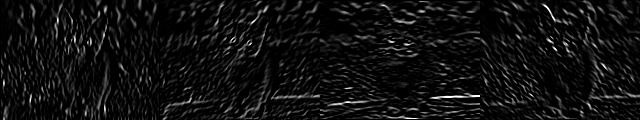

In [2]:
(defn apply-gabor [ img angle]
  (->
    img
    clone
    (filter-2-d! (.type img)  (kernel-by-theta angle))))

(u/>>> 
  (hconcat! (into [] (map #(apply-gabor img %) [0 45 90 135])  )))

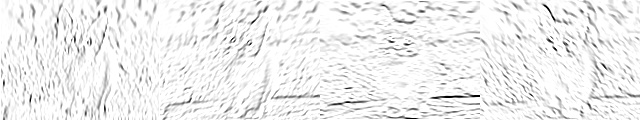

In [3]:
(defn apply-gabor-inv [ img angle]
  (-> img
    (apply-gabor angle)
    bitwise-not!))

(u/>>> 
  (hconcat! (into [] (map #(apply-gabor-inv img %) [0 45 90 135]))))